# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

C:\Users\aab\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# Логнормальное распределение

lognorm_rv = sts.lognorm(s = 0.8)
sample = lognorm_rv.rvs(100)
sample

array([0.64863942, 1.35978789, 0.65266472, 0.70768416, 0.4464719 ,
       0.5468211 , 0.61302842, 0.33655042, 1.62155647, 1.48003753,
       0.94926887, 0.95739218, 0.43074999, 2.27510732, 0.31140462,
       0.70832756, 0.43987253, 0.95188207, 0.86127338, 0.76471689,
       0.62612219, 3.0038735 , 2.04186176, 0.35708574, 0.71292586,
       2.22423272, 2.88740873, 1.26923158, 0.98144599, 1.1065794 ,
       2.99162096, 0.3634337 , 7.15697214, 0.72159394, 0.73832659,
       1.37377336, 0.81025601, 1.0759373 , 1.24791276, 1.66188958,
       2.25783308, 3.72681116, 0.51756708, 1.19337723, 0.12069369,
       1.10238171, 1.05907469, 1.361213  , 1.28876167, 1.60435578,
       3.21773059, 0.82867531, 0.60474778, 1.43658524, 0.56294461,
       0.57195708, 1.42126136, 1.13795123, 0.71985972, 1.42900043,
       0.34506254, 1.2172087 , 1.56544902, 1.0303315 , 0.55128862,
       1.55353178, 0.47458729, 0.75990939, 2.01754484, 1.27395508,
       1.12783968, 1.06956298, 0.9918225 , 1.55160135, 1.75208

In [3]:
real_mean = lognorm_rv.mean() # настоящее среднее случайной величины

In [4]:
real_var = lognorm_rv.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

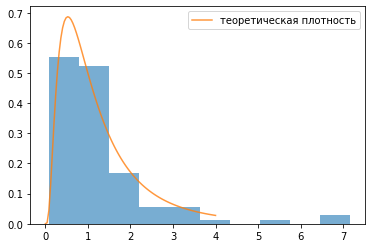

In [5]:
plt.hist(sample, density = True, alpha = 0.6)
x = np.linspace(0, 4, 100)
pdf = lognorm_rv.pdf(x)
plt.plot(x, pdf, label = 'теоретическая плотность', alpha = 0.8)
plt.legend();

In [6]:
sample_mean = sample.mean() # выборочное среднее
print(round(sample_mean, 5))
sample_var = sample.var() # выборочная дисперсия
print(round(sample_var, 5))

1.27886
1.30951


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

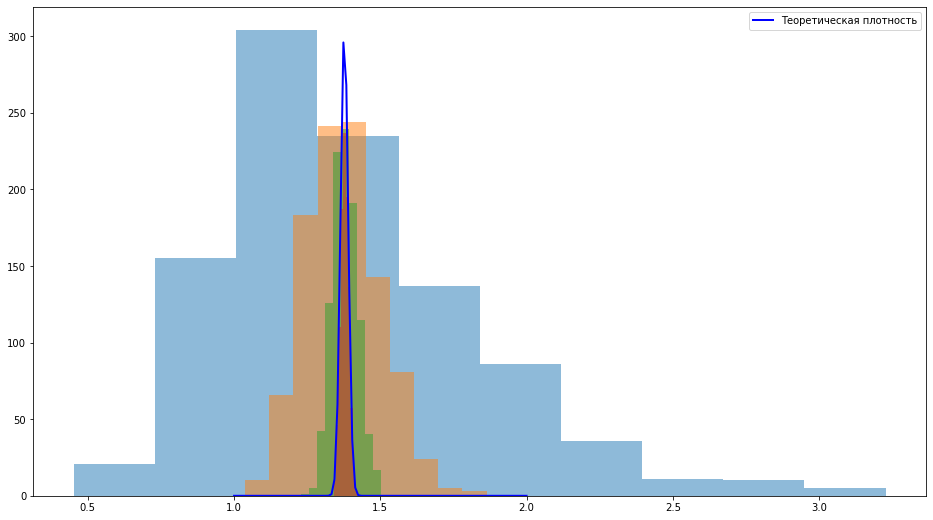

In [9]:
plt.figure(figsize = (16, 9))
# сгенерируем несколько выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(lognorm_rv.rvs(N)))
    plt.hist(means, alpha = 0.5)

plt.legend(['10', '100', '1000', '10000'])

norm_rv = sts.norm(loc = lognorm_rv.mean(), scale = lognorm_rv.std() / np.sqrt(N-1))
x = np.linspace(1, 2, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf * 10 , label = 'Теоретическая плотность', linewidth = 2.0, c = 'b')
plt.legend()

plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Для логнормального распределения апроксимация распределения выборочного среднего работает хорошо при размере выборки от 10000

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [10]:
# загружаем данные из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df = pd.read_csv(url)
print(df.shape)
df.head()

(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
# ваш код тут
df2 = df.groupby('churn').agg({'state': 'count', 'total day calls': ['mean','std']}).reset_index()
df2.columns = ['churn', 'count', 'mean', 'std']  
df2.head()

,churn,count,mean,std
0,False,2850,100.283158,19.801157
1,True,483,101.335404,21.582307


In [37]:
# оценкa с использованием явной формулы для z интервала

disp = np.std(df[df['churn'] == False]['total day calls'], ddof = 1)
data = df[df['churn'] == False]['total day calls']
N = df[df["churn"] == False]['churn'].count()

print(f'''Доверительный интервал для среднего группы "Не ушел" по цпт, если нам известна дисперсия: 
          [{np.mean(data) - 1.96 * disp / np.sqrt(N-1)}, {np.mean(data) + 1.96 * disp / np.sqrt(N-1)}] ''')

disp = np.std(df[df["churn"] == True]["total day calls"], ddof = 1)
data = df[df["churn"] == True]["total day calls"]
N = df[df["churn"] == True]['churn'].count()

print(f'''Доверительный интервал для среднего группы "Ушел" по цпт, если нам известна дисперсия: 
          [{np.mean(data) - 1.96 * disp / np.sqrt(N-1)}, {np.mean(data) + 1.96 * disp / np.sqrt(N-1)}] ''')


Доверительный интервал для среднего группы "Не ушел" по цпт, если нам известна дисперсия: 
          [99.55604740026511, 101.01026838920858] 
Доверительный интервал для среднего группы "Ушел" по цпт, если нам известна дисперсия: 
          [99.40863130099713, 103.26217615241903] 


In [32]:
# метод расчета _zconfint_generic
import statsmodels.stats.weightstats as ssw

print(f'''Доверительный интервал для среднего группы "Не ушел" по цпт методом _zconfint_generic:
          {ssw._zconfint_generic(np.mean(df[df["churn"] == False]["total day calls"]),
                                 np.std(df[df["churn"] == False]["total day calls"], ddof = 1), 
                                 alpha = 0.95, alternative = 'two-sided')} '''
     )

print(f'''Доверительный интервал для среднего группы "Ушел" по цпт методом _zconfint_generic:
          {ssw._zconfint_generic(np.mean(df[df["churn"] == True]["total day calls"]),
                                 np.std(df[df["churn"] == True]["total day calls"], ddof = 1), alpha = 0.95, alternative = 'two-sided')} '''
     )

Доверительный интервал для среднего группы "Не ушел" по цпт методом _zconfint_generic:
          (99.04149114274125, 101.52482464673244) 
Доверительный интервал для среднего группы "Ушел" по цпт методом _zconfint_generic:
          (99.98204678079553, 102.68876067262063) 


Доверительный интервал для среднего метода с явной формулой уже для группы "Не ушел" и шире для группы "Ушел" по сравнению с доверительными интервалами полученными методом _zconfint_generic.  
 
 
 


In [33]:
# Метод расчета - интервальная оценка по цпт:
print(f'''Доверительный интервал для среднего группы "Не ушел": 
            {sts.norm.interval(alpha = 0.95, loc = df2[df2["churn"] == False]["mean"][0], 
                               scale = df2[df2["churn"] == False]["std"][0] / np.sqrt(df2[df2["churn"] == False]["count"][0] - 1))} ''')

print(f'''Доверительный интервал для среднего группы "Ушел": 
            {sts.norm.interval(alpha = 0.95, loc = df2[df2["churn"] == True]["mean"][1], 
                               scale = df2[df2["churn"] == True]["std"][1] / np.sqrt(df2[df2["churn"] == True]["count"][1] - 1))} ''')


Доверительный интервал для среднего группы "Не ушел": 
            (99.55606076109109, 101.0102550283826) 
Доверительный интервал для среднего группы "Ушел": 
            (99.40866670589261, 103.26214074752355) 
